# Вычислительная математика ДЗ №2 Часть 2

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def power_func(x):
  return pow(2, x)

def custom_func(x):
  return pow(1 + 25 * pow(x, 2), -1)

def lagrange_polynom(x_vals, y_vals):
  x_plt = np.linspace(x_vals[0], x_vals[-1], num=500)
  y_plt = np.array([])

  for xp in x_plt:
    y_calc = 0
    for xi, yi in zip(x_vals, y_vals):
      y_calc += yi * np.prod((xp - x_vals[x_vals != xi]) / (xi - x_vals[x_vals != xi]))
    y_plt = np.append(y_plt, y_calc)
      
  return x_plt, y_plt



In [ ]:
def jacobi(A, b, x0, tol, n_iterations=300):
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations):
        for i in range(0, n): 
            s = 0
            for j in range(0,n): 
                if i != j:
                    s += A[i,j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i,i]

        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() 
        
    return x

# Определяем коэффициенты b, c, d для каждого кубического полинома
def cubic_spline(x, y, tol = 1e-100):
  x = np.array(x)
  y = np.array(y)

  if np.any(np.diff(x) < 0):
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]

  size = len(x)
  delta_x = np.diff(x)
  delta_y = np.diff(y)

  A = np.zeros(shape = (size,size))
  b = np.zeros(shape=(size,1))
  A[0,0] = 1
  A[-1,-1] = 1

  for i in range(1, size - 1):
    A[i, i-1] = delta_x[i-1]
    A[i, i+1] = delta_x[i]
    A[i,i] = 2*(delta_x[i-1]+delta_x[i])

    b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])

  c = jacobi(A, b, np.zeros(len(A)), tol = tol, n_iterations=1000)


  d = np.zeros(shape = (size-1,1))
  b = np.zeros(shape = (size-1,1))
  for i in range(0,len(d)):
    d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
    b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    

  return b.squeeze(), c.squeeze(), d.squeeze()

In [ ]:
# Определяем индекс сплайна
def find_index(val, x_vals):
  for i, j in enumerate(x_vals):
    if val >= x_vals[i] and val <= x_vals[i+1]:
      return i
  return 0

def cubic_polynom_draw(x_vals, y_vals):
  b, c, d = np.array(cubic_spline(x_vals, y_vals))
  cf = np.transpose(np.array([b, c[:-1], d]))
  x_plt = np.linspace(x_vals[0], x_vals[-1], num=500)
  y_plt = np.array([])

  for xi in x_plt:
    i = find_index(xi, x_vals)
    y_calc = y_vals[i] + cf[i][0] * (xi - x_vals[i]) + cf[i][1] * pow((xi - x_vals[i]), 2) + cf[i][2] * pow((xi - x_vals[i]), 3)
    y_plt = np.append(y_plt, y_calc)

  return x_plt, y_plt

### Полином Лагранжа для y = 2^x

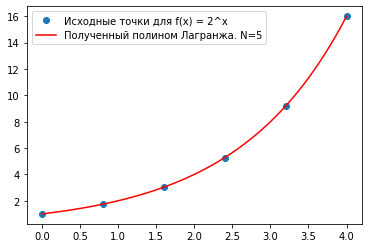

In [ ]:
n = 5
sect = [0, 4]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = 2^x')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

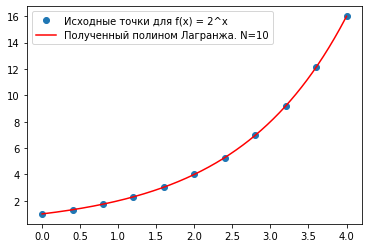

In [ ]:
n = 10
sect = [0, 4]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = 2^x')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

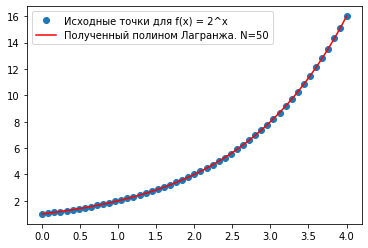

In [ ]:
n = 50
sect = [0, 4]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = 2^x')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

### Полином Лагранжа для y = (1 + 25x^2)^-1

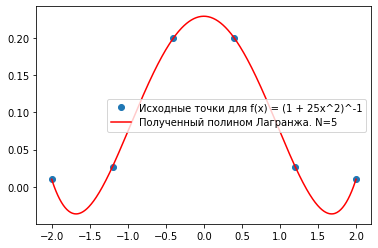

In [ ]:
n = 5
sect = [-2.0, 2.0]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = (1 + 25x^2)^-1')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

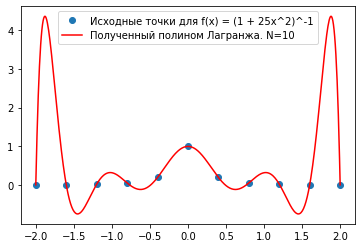

In [ ]:
n = 10
sect = [-2.0, 2.0]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = (1 + 25x^2)^-1')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

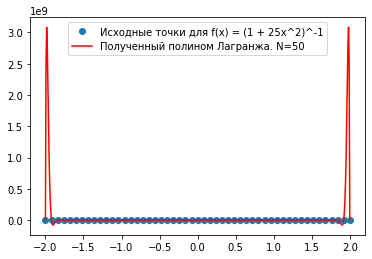

In [ ]:
n = 50
sect = [-2.0, 2.0]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = lagrange_polynom(x_vals, y_vals)

plt.plot(x_vals, y_vals, 'o', label=f'Исходные точки для f(x) = (1 + 25x^2)^-1')
plt.plot(x_plt, y_plt, 'r-', label=f'Полученный полином Лагранжа. N={n}')
plt.legend()

#Интерполяция системой кубических сплайнов

## y = 2^x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


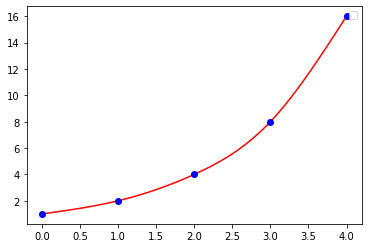

In [ ]:
x_vals = np.linspace(0.0, 4.0, num=5)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


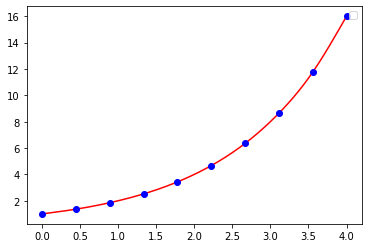

In [ ]:
x_vals = np.linspace(0.0, 4.0, num=10)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


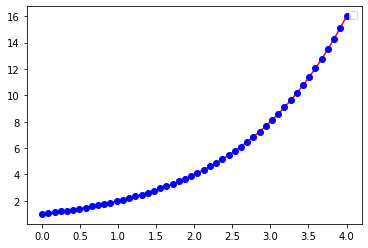

In [ ]:
x_vals = np.linspace(0.0, 4.0, num=50)
y_vals = np.array(power_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

## y = (1 + 25x^2)^-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


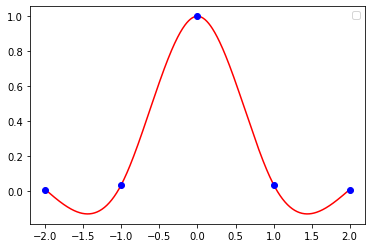

In [ ]:
x_vals = np.linspace(-2.0, 2.0, num=5)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


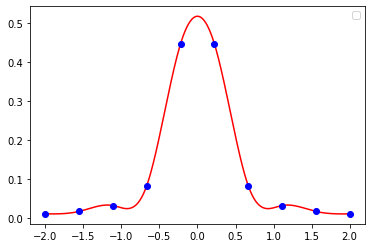

In [ ]:
x_vals = np.linspace(-2.0, 2.0, num=10)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
No handles with labels found to put in legend.


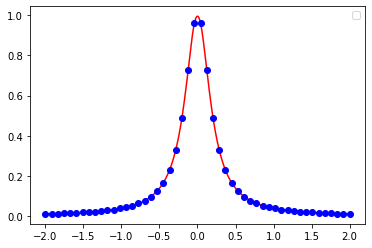

In [ ]:
x_vals = np.linspace(-2.0, 2.0, num=50)
y_vals = np.array(custom_func(x_vals))

x_plt, y_plt = cubic_polynom_draw(x_vals, y_vals)

plt.plot(x_plt, y_plt, 'r-')
plt.plot(x_vals, y_vals, 'bo')
plt.legend()

## Сравнение интерполирующих функций

### Функция f(x) = 2^x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


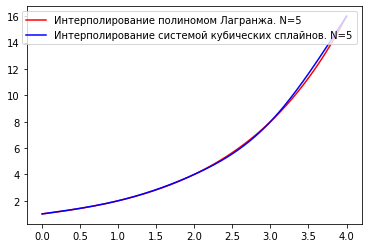

In [ ]:
n = 5
sect = [0, 4]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(power_func(x_vals))

x_plt_l, y_plt_l = lagrange_polynom(x_vals, y_vals)

plt.plot(x_plt_l, y_plt_l, 'r-', label=f'Интерполирование полиномом Лагранжа. N={n}')

x_vals_custom = np.linspace(0.0, 4.0, num=n)
y_vals_custom = np.array(power_func(x_vals_custom))

x_plt_c, y_plt_c = cubic_polynom_draw(x_vals_custom, y_vals_custom)

plt.plot(x_plt_c, y_plt_c, 'b-', label=f'Интерполирование системой кубических сплайнов. N={n}')
plt.legend()

### Функция f(x) = (1 + 25x^2)^-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


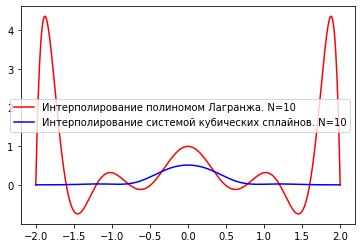

In [ ]:
n = 10
sect = [-2.0, 2.0]
h = (sect[-1] - sect[0]) / n
x_vals = np.arange(sect[0], sect[-1] + h, step=h)
y_vals = np.array(custom_func(x_vals))

x_plt_l, y_plt_l = lagrange_polynom(x_vals, y_vals)

plt.plot(x_plt_l, y_plt_l, 'r-', label=f'Интерполирование полиномом Лагранжа. N={n}')

x_vals_custom = np.linspace(-2.0, 2.0, num=n)
y_vals_custom = np.array(custom_func(x_vals_custom))

x_plt_c, y_plt_c = cubic_polynom_draw(x_vals_custom, y_vals_custom)

plt.plot(x_plt_c, y_plt_c, 'b-', label=f'Интерполирование системой кубических сплайнов. N={n}')
plt.legend()